# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |



# 4 Python Advanced Programming


## 4.1 General plots

It happens often that we do not know all of the x or y values for a graph
ahead of time, but work them out one by one as part of some calculation we
are doing. In that case, a good way to create a graph of the results is to start
with two empty lists for the x- and y-coordinates and add points to them one
by one, as we calculate the values. Going back to the sine wave example, for
instance, here is an alternative way to make a graph of sin x that calculates the
individual values one by one and adds them to a growing list

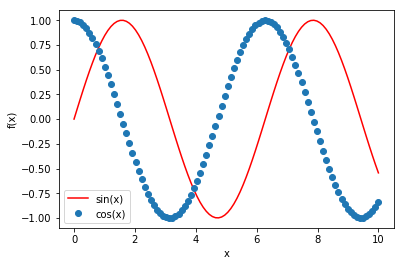

In [2]:
%matplotlib inline  

import matplotlib.pyplot as plt
from math import sin, cos
from numpy import linspace

x = []
y1 = []
y2 = []

for i in linspace(0,10,100):
    x.append(i)
    y1.append(sin(i))
    y2.append(cos(i))
    
plt.plot(x, y1, 'r', label='sin(x)')
plt.plot(x, y2, 'o', label='cos(x)')
plt.legend()

plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


## 4.2 Density plots

There are many times in physics when we need to work with two-dimensional
grids of data. A condensed matter physicist might measure variations in charge
or temperature or atomic deposition on a solid surface; a fluid dynamicist
might measure the heights of waves in a ripple tank; a particle physicist might
measure the distribution of particles incident on an imaging detector; and so
on. Two-dimensional data are harder to visualize on a computer screen than
the one-dimensional lists of values that go into an ordinary graph. But one
tool that is helpful in many cases is the density plot, a two-dimensional plot
where color or brightness is used to indicate data values.

In [1]:
# Please dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
# and save it along with your jupter notebook

import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("circular.txt",float)
print(np.shape(data))

(501, 501)


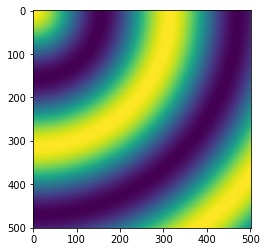

In [24]:
plt.imshow(data)
plt.show()

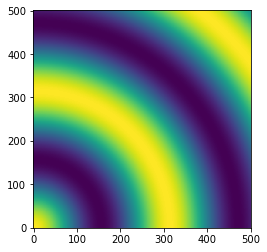

In [14]:
plt.imshow(data, origin="lower")
plt.show()

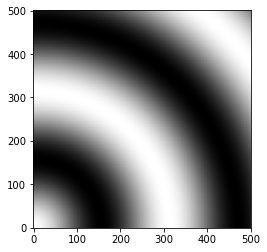

In [15]:
plt.imshow(data, origin="lower")
plt.gray()
plt.show()

# Quiz:

Can you let the python automatically download the source data, and then make the plot?
Try to run and debug the following code.

```python
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

data = the_page
print(np.shape(data))
plt.imshow(data, origin="lower")
plt.show()
```

## Example: WAVE INTERFERENCE
Suppose we drop a pebble in a pond and waves radiate out from the spot
where it fell. We could create a simple representation of the physics with a sine
wave, spreading out in a uniform circle, to represent the height of the waves at
some later time. If the center of the circle is at $x_1$, $y_1$, then the distance $r_1$ to the
center from a point $x, y$ is

$$r_1=\sqrt{(x-x_1)^2 + (y-y_1)^2}$$

and the sine wave for the height is

$$h_1(x,y) = h_0\text{sin}(kr_1)$$

where $h_0$ is the amplitude of the waves and $k$ is the wavevector, related to the
wavelength $\lambda$ by $k = 2\pi/\lambda$.

Now suppose we drop another pebble in the pond, creating another circular
set of waves with the same wavelength and amplitude but centered on a
different point $x_2$, $y_2$:

$$h_2(x,y) = h_0\text{sin}(kr_2)$$

$$r_2=\sqrt{(x-x_2)^2 + (y-y_2)^2}$$


Then, assuming the waves add linearly (which is a reasonable assumption for
water waves, provided they are not too big), the total height of the surface at a
point $x, y$ is

$$h(x,y) = h_0\text{sin}(kr_1) + h_0\text{sin}(kr_2) $$

Suppose the wavelength of the waves is $\lambda$ = 5 cm, the amplitude is 1 cm, and
the centers of the circles are 20 cm apart. 

Write a program to make an image of the height over a 1 m square region of the pond. 

## Some thoughts before programming

To make the image 

    1, create an array of values representing the height h at a grid of points 
    2, use that array to make a density plot
    3, use a grid of 500 × 500 points to cover the 1 m square

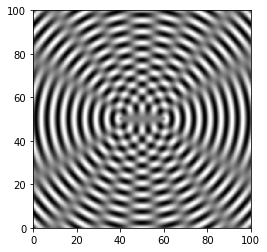

In [17]:
from math import sqrt,sin,pi
from numpy import empty

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm


# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = empty([points,points],float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)

# Make the plot
plt.imshow(xi,origin="lower",extent=[0,side,0,side])
#plt.gray()
plt.show()

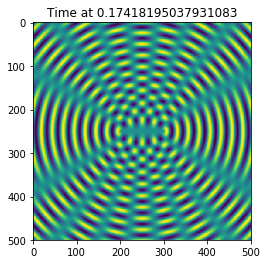

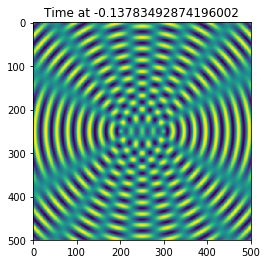

In [3]:
from math import sqrt,sin,pi
from numpy import empty

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm
v = 10

# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Calculate the values in the array
for t in [0, 1]:
    # Make an array to store the heights
    xi = empty([points,points],float)
    for i in range(points):
        y = spacing*i
        for j in range(points):
            x = spacing*j
            r1 = sqrt((x-x1)**2+(y-y1)**2)
            r2 = sqrt((x-x2)**2+(y-y2)**2)
            xi[i,j] = xi0*sin(k*r1-v*t) + xi0*sin(k*r2-v*t)
    # Make the plot
    plt.imshow(xi) #, extent=[0,side,0,side])
    plt.title('Time at ' + str(xi[200,200]))
    #plt.gray()
    plt.show()

## 4.3 3D Objects in vpython
VPython makes it easy to create navigable 3D displays and animations, even for those with limited programming experience. Because it is based on Python, it also has much to offer for experienced programmers and researchers.

In [13]:
from vpython import *
L = 5
R = 0.3
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            sphere(pos=vector(i,j,k),radius=R)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
## Animation
from vpython import *
from math import cos,sin,pi
from numpy import arange
s = sphere(pos=vector(1,0,0),radius=0.1)
for theta in arange(0,10*pi,0.1):
    rate(30)
    x = cos(theta)
    y = sin(theta)
    s.pos = vector(x,y,0)

## 4.4 Tips on writing a good program
* Include comments in your programs
* Use meaningful variable names
* Use the right types of variables
* Define the constants
* Print out partial results and updates throughout your program if it takes long time to run
* Lay out your programs clearly
* Don’t make your programs unnecessarily complicated
* Import functions first in python


## 4.5 Homework: 

### 4.5.1 Mandelbrot set

The Mandelbrot set, named after its discoverer, the French mathematician Mandelbrot, 
is a fractal, an infinitely ramified mathematical object that contains structure 
within structure within structure, as deep as we care to look.

The definition of the Mandelbrot set is in terms of complex numbers as follows.
Consider the equation

$$z' = z^2 + c$$

where $z$ is a complex number and $c$ is a complex constant. For any given value of
$c$ this equation turns an input number z into an output number $z'$. 

The definition of the Mandelbrot set involves the repeated iteration of this equation: 
we take an initial starting value of $z$ and feed it into the equation to get a new value $z'$. 

Then we take that value and feed it in again to get another value, and so forth. 


The Mandelbrot set is the set of points in the complex plane that satisfies the following definition:

_For a given complex value of c, start with z = 0 and iterate repeatedly. If the
magnitude |z| of the resulting value is ever greater than 2, then the point in the
complex plane at position c is not in the Mandelbrot set, otherwise it is in the set._

In order to use this definition one would, in principle, have to iterate infinitely many
times to prove that a point is in the Mandelbrot set, since a point is in the set only if
the iteration never passes |z| = 2 ever. In practice, however, one usually just performs
some large number of iterations, say 100, and if |z| hasn’t exceeded 2 by that point then
we call that good enough.

#### Task

Write a program to make an image of the Mandelbrot set by performing the iteration
for all values of $c = x + iy$ on an $N \times N$ grid spanning the region where −2 ≤ x ≤ 2
and −2 ≤ y ≤ 2. Make a density plot in which grid points inside the Mandelbrot set
are colored black and those outside are colored white. 

Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a
small value (perhaps $N$ = 100) —so that your program runs quickly while you are
testing it. Once you are sure it is working correctly, increase the value of N to produce
a final high-quality image of the shape of the set.

### 4.5.2 (optional)
Choose a cool plot made by python

### Project 1:
Write an python code to provide an interactive interface to simulate the propogation of waves due to the dropped pebbles in a pool. This interface should allow the user to do the following
- `drop pebble` button to set up the position of the first pebble
- `start` buttion to initiate the animation of the wave propogation
- `drop pebble` button to pause the animation and set up the position of the second pebble
- `continue` button to continue to model the wave proprogations due to two pebbles
- `terminate` button to terminate this simulation

One can refer to the [bokeh](https://bokeh.pydata.org/en/latest/docs/gallery.html) gallery for the hints to realize these functions.